# Cicero Downstream Analysis
This notebook analyzes the outputs from 08ba_cicero.R.ipynb

In [1]:
library(cicero)
library(monocle3)
library(Seurat)
library(Signac)
library(GenomicRanges)
library(ggforce)
# library(BSgenome.Hsapiens.UCSC.hg38)

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: ggplot2

Loading required package: VGAM

Loading r

In [2]:
# set outdir and load what we needoutdir             <- "08b_cicero_output/"conns              <- readRDS(paste0(outdir, "conns.rds"))dasahic2_conns     <- readRDS(paste0(outdir, "dasaHIC2_dasaNT_conns.rds"))# load hic2 differential peaksdiff_peaks         <- read.csv('{PATH_1}')# load sobj just in casesobj               <- readRDS('{PATH_2}')Idents(sobj) <- sobj$treatment_and_guidecaptureDefaultAssay(sobj) <- "ATAC"# load input_cds made from lgr2 since it can't be made hereinput_cds          <- readRDS(paste0(outdir, "input_cds.rds"))

In [3]:
dasahic2_conns

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
10,chr1-100005635-100006316,chr1-99771233-99772164,-7.525356e-04
145,chr1-100010258-100011063,chr1-99771233-99772164,-1.223562e-03
280,chr1-100023479-100024026,chr1-99771233-99772164,-4.234573e-04
415,chr1-100024146-100024859,chr1-99771233-99772164,-1.445988e-03
550,chr1-100028498-100029477,chr1-99771233-99772164,0.000000e+00
685,chr1-100034219-100035123,chr1-99771233-99772164,8.473929e-03
820,chr1-100036574-100037115,chr1-99771233-99772164,-3.069979e-03
955,chr1-100037726-100038549,chr1-99771233-99772164,-5.049019e-04
1090,chr1-100046581-100047338,chr1-99771233-99772164,-2.492601e-02


In [3]:
# load gtf and create object for gene annotationgtf_path   <- '{PATH_3}'gene_anno  <- rtracklayer::readGFF(gtf_path)# get gene_anno to be the right formatchromosome <- gene_anno$seqidstart      <- gene_anno$startend        <- gene_anno$endstrand     <- gene_anno$strandfeature    <- gene_anno$gene_typegene       <- gene_anno$gene_idtranscript <- gene_anno$transcript_idsymbol     <- gene_anno$gene_namegene_anno  <- data.frame(chromosome, start, end, strand, feature, gene, transcript, symbol)head(gene_anno)

,chromosome,start,end,strand,feature,gene,transcript,symbol
,<fct>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,11869,14409,+,lncRNA,ENSG00000290825.1,NA,DDX11L2
2,chr1,11869,14409,+,lncRNA,ENSG00000290825.1,ENST00000456328.2,DDX11L2
3,chr1,11869,12227,+,lncRNA,ENSG00000290825.1,ENST00000456328.2,DDX11L2
4,chr1,12613,12721,+,lncRNA,ENSG00000290825.1,ENST00000456328.2,DDX11L2
5,chr1,13221,14409,+,lncRNA,ENSG00000290825.1,ENST00000456328.2,DDX11L2
6,chr1,12010,13670,+,transcribed_unprocessed_pseudogene,ENSG00000223972.6,NA,DDX11L1


In [19]:
# subset sobj for DMSO_NT, DASA_NT, DASA_HIC2
Idents(sobj) <- sobj$treatment_and_guidecapture
sub_sobj <- subset(sobj, idents = c("DMSO_NT", "DASA_NT", "DASA_HIC2"))
dasa_hic2_nt_sobj <- subset(sobj, idents = c("DASA_NT", "DASA_HIC2"))

In [5]:
heatmap_peaks <- read.csv("13_dasa_hic2_dasa_nt_dmso_nt_mean_expression_atac_da_clustered2.csv")
head(heatmap_peaks)

,X,DMSO_NT,DASA_NT,DASA_HIC2,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,chr22-21946220-21946985,-1.141274,0.7226922,0.4185814,1
2,chr9-93576053-93576906,-1.140149,0.7283295,0.4118198,1
3,chr3-178679835-178680663,-1.135997,0.7472549,0.3887423,1
4,chr11-68120277-68120987,-1.135745,0.7483213,0.3874241,1
5,chr10-136001-136688,-1.135731,0.7483804,0.3873511,1
6,chr1-186288093-186289195,-1.133993,0.7555288,0.3784645,1


In [6]:
# subset for for clusters determined on lgr2
up_down_up_genes <- heatmap_peaks[heatmap_peaks$cluster == 3, ]
# down_up_down_genes <- heatmap_peaks[(heatmap_peaks$cluster == 2) | (heatmap_peaks$cluster == 3), ]
down_up_down_genes <- heatmap_peaks[(heatmap_peaks$cluster == 1), ]

In [7]:
dim(up_down_up_genes)
dim(down_up_down_genes)

[1] 49  5

[1] 176   5

In [8]:
# only way I could get this to run is to hard set coaccess_cutoff_override
# default is it tries to calc one on it's own (coaccess_cutoff_override = NULL)
ccans <- generate_ccans(conns, coaccess_cutoff_override = 0.1)
hic2_ccans <- generate_ccans(dasahic2_conns, coaccess_cutoff_override = 0.1) 

[1] "Coaccessibility cutoff used: 0.1"
[1] "Coaccessibility cutoff used: 0.1"


In [20]:
Links(sub_sobj) <- links

In [11]:
# Function to adjust start and end positions
adjust_positions <- function(coord) {
  parts <- strsplit(coord, "-")[[1]]  # Split each coordinate into parts
  chromosome <- parts[1]              # Chromosome part
  start <- as.numeric(parts[2]) - 5000  # Subtract n from start
  end <- as.numeric(parts[3]) + 5000    # Add n to end
  
  # Reconstruct the coordinate string
  return(paste(chromosome, start, end, sep = "-"))
}

In [24]:
levels(sub_sobj) <- c("DMSO_NT", "DASA_NT", "DASA_HIC2")

Warning message:
"Removed 116 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 32 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 175 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 366 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


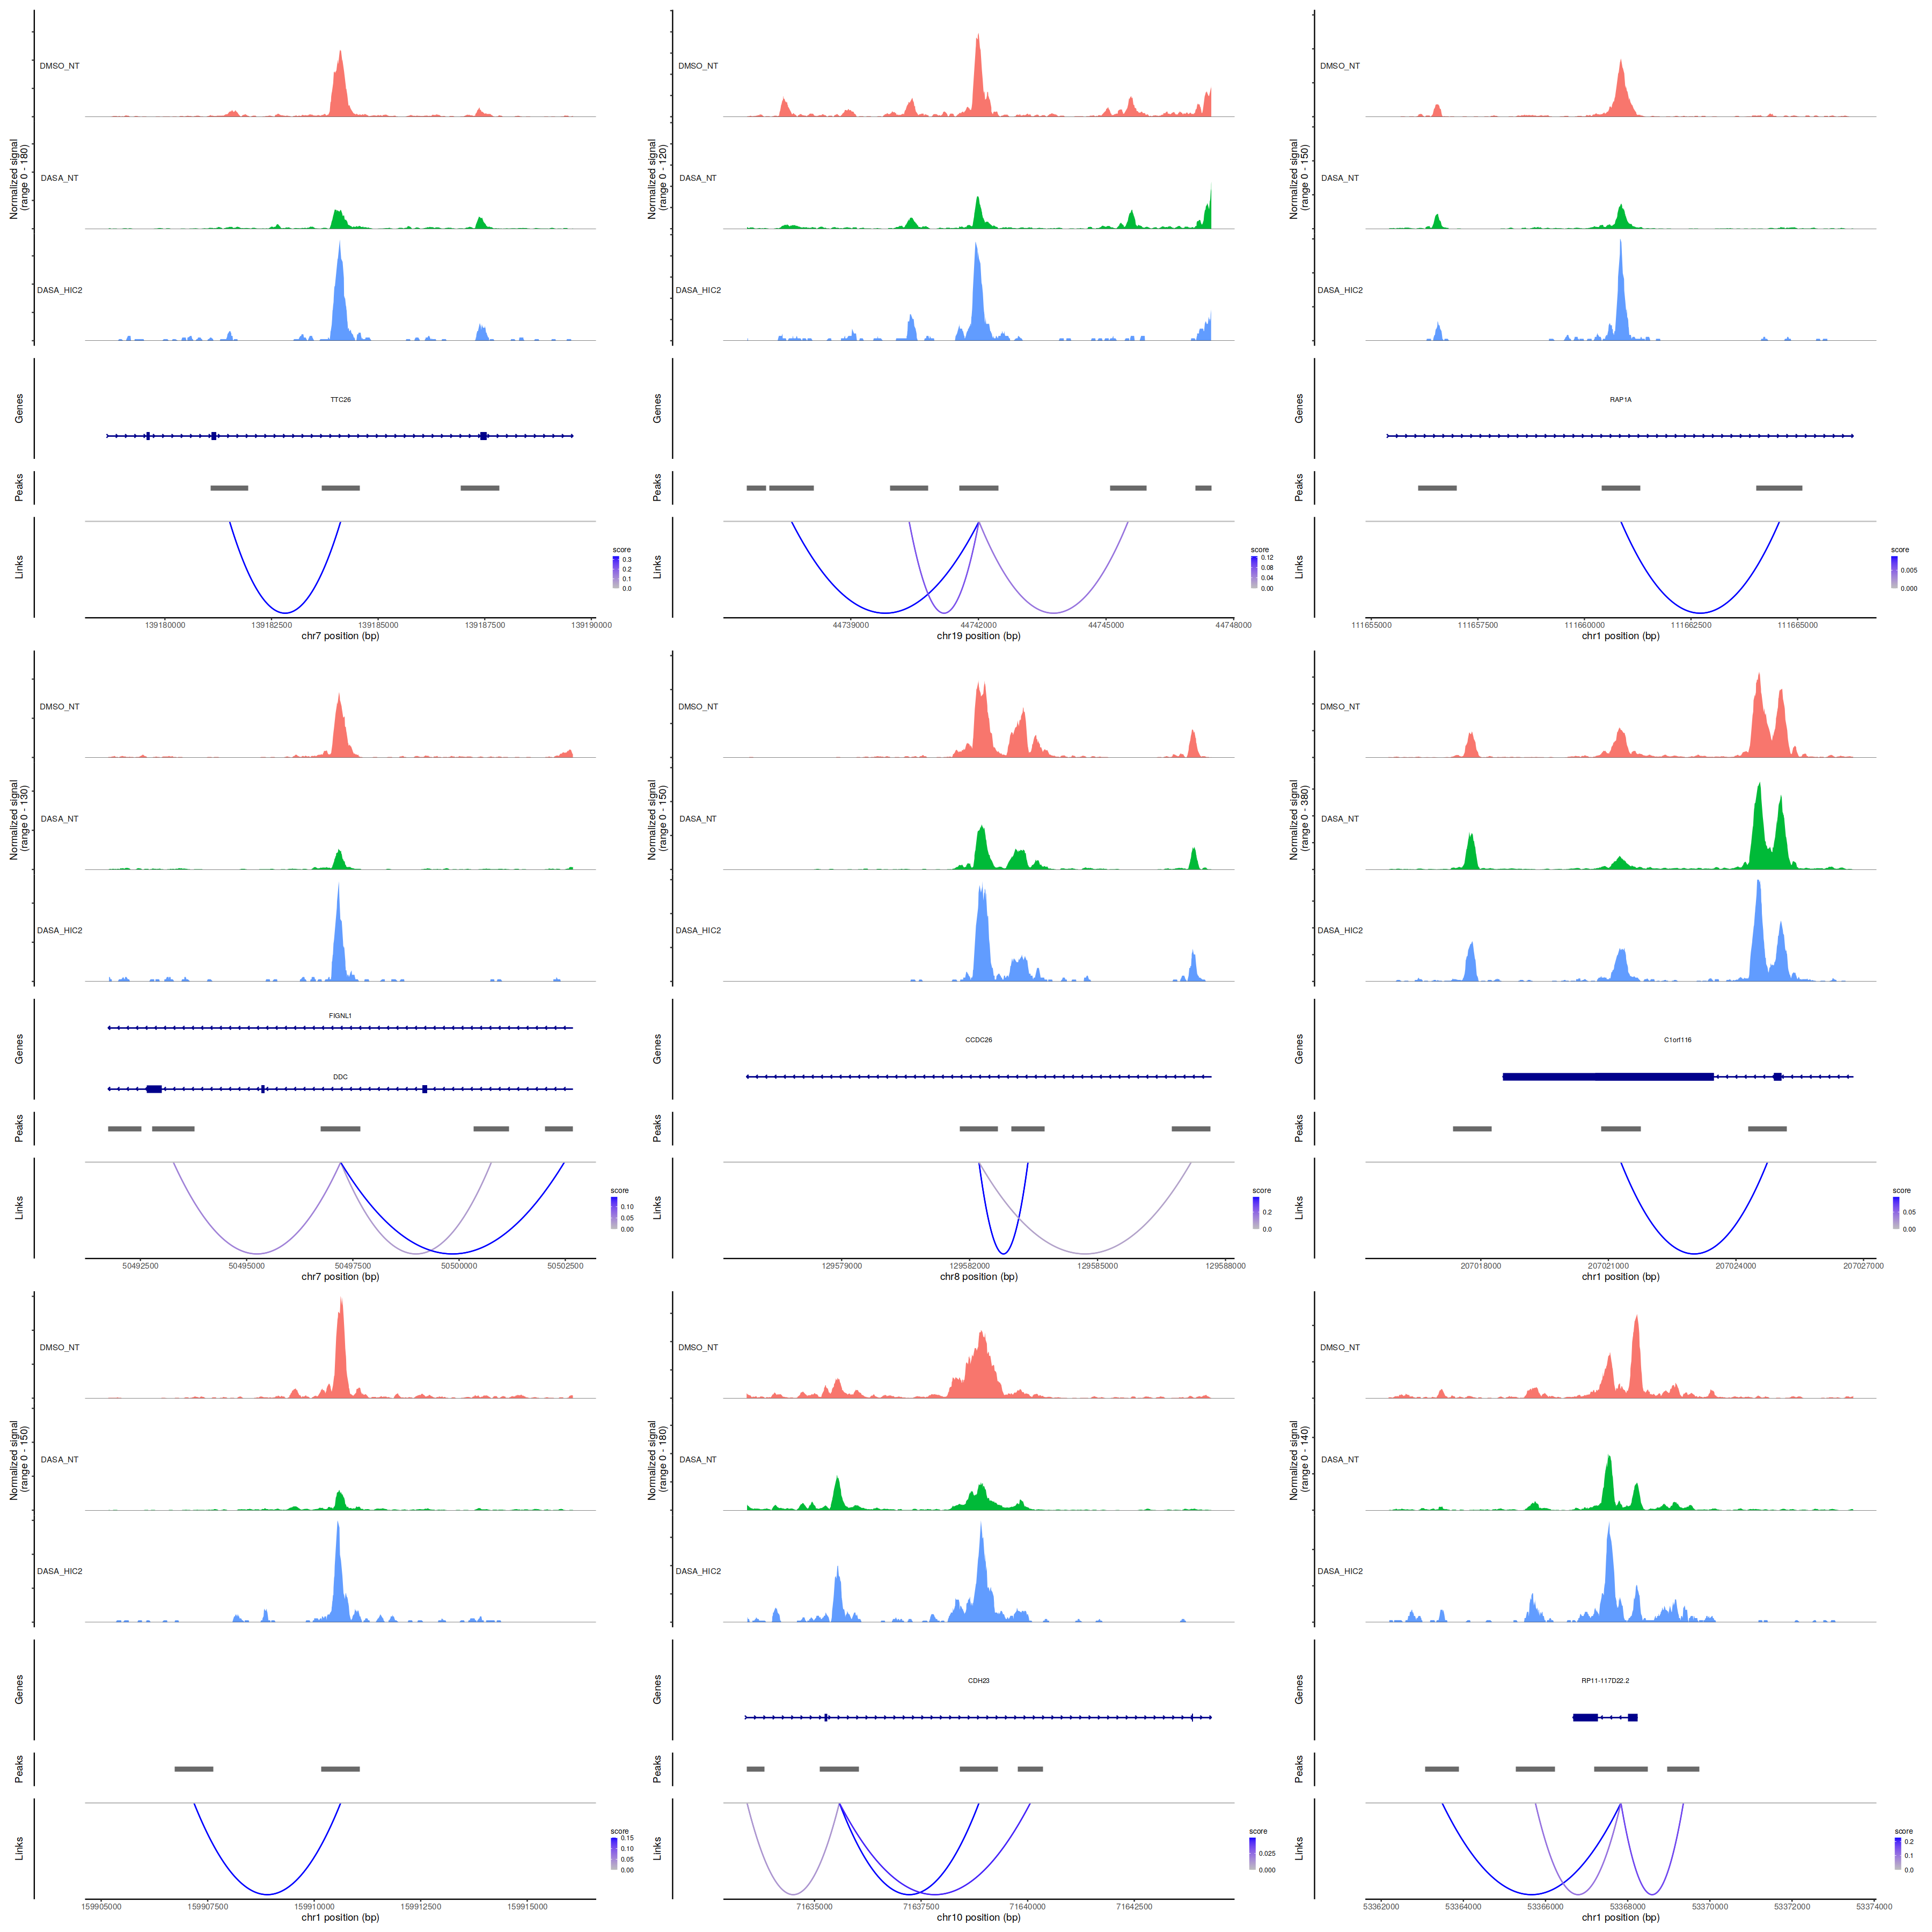

In [25]:
options(repr.plot.width = 30, repr.plot.height = 30)
CoveragePlot(sub_sobj, 
    region = sapply(up_down_up_genes$X[1:9], adjust_positions),
    expression.assay = "SCT") # TCF4

Warning message:
"Removed 39 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 36 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 49 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 52 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 188 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 21 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 77 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


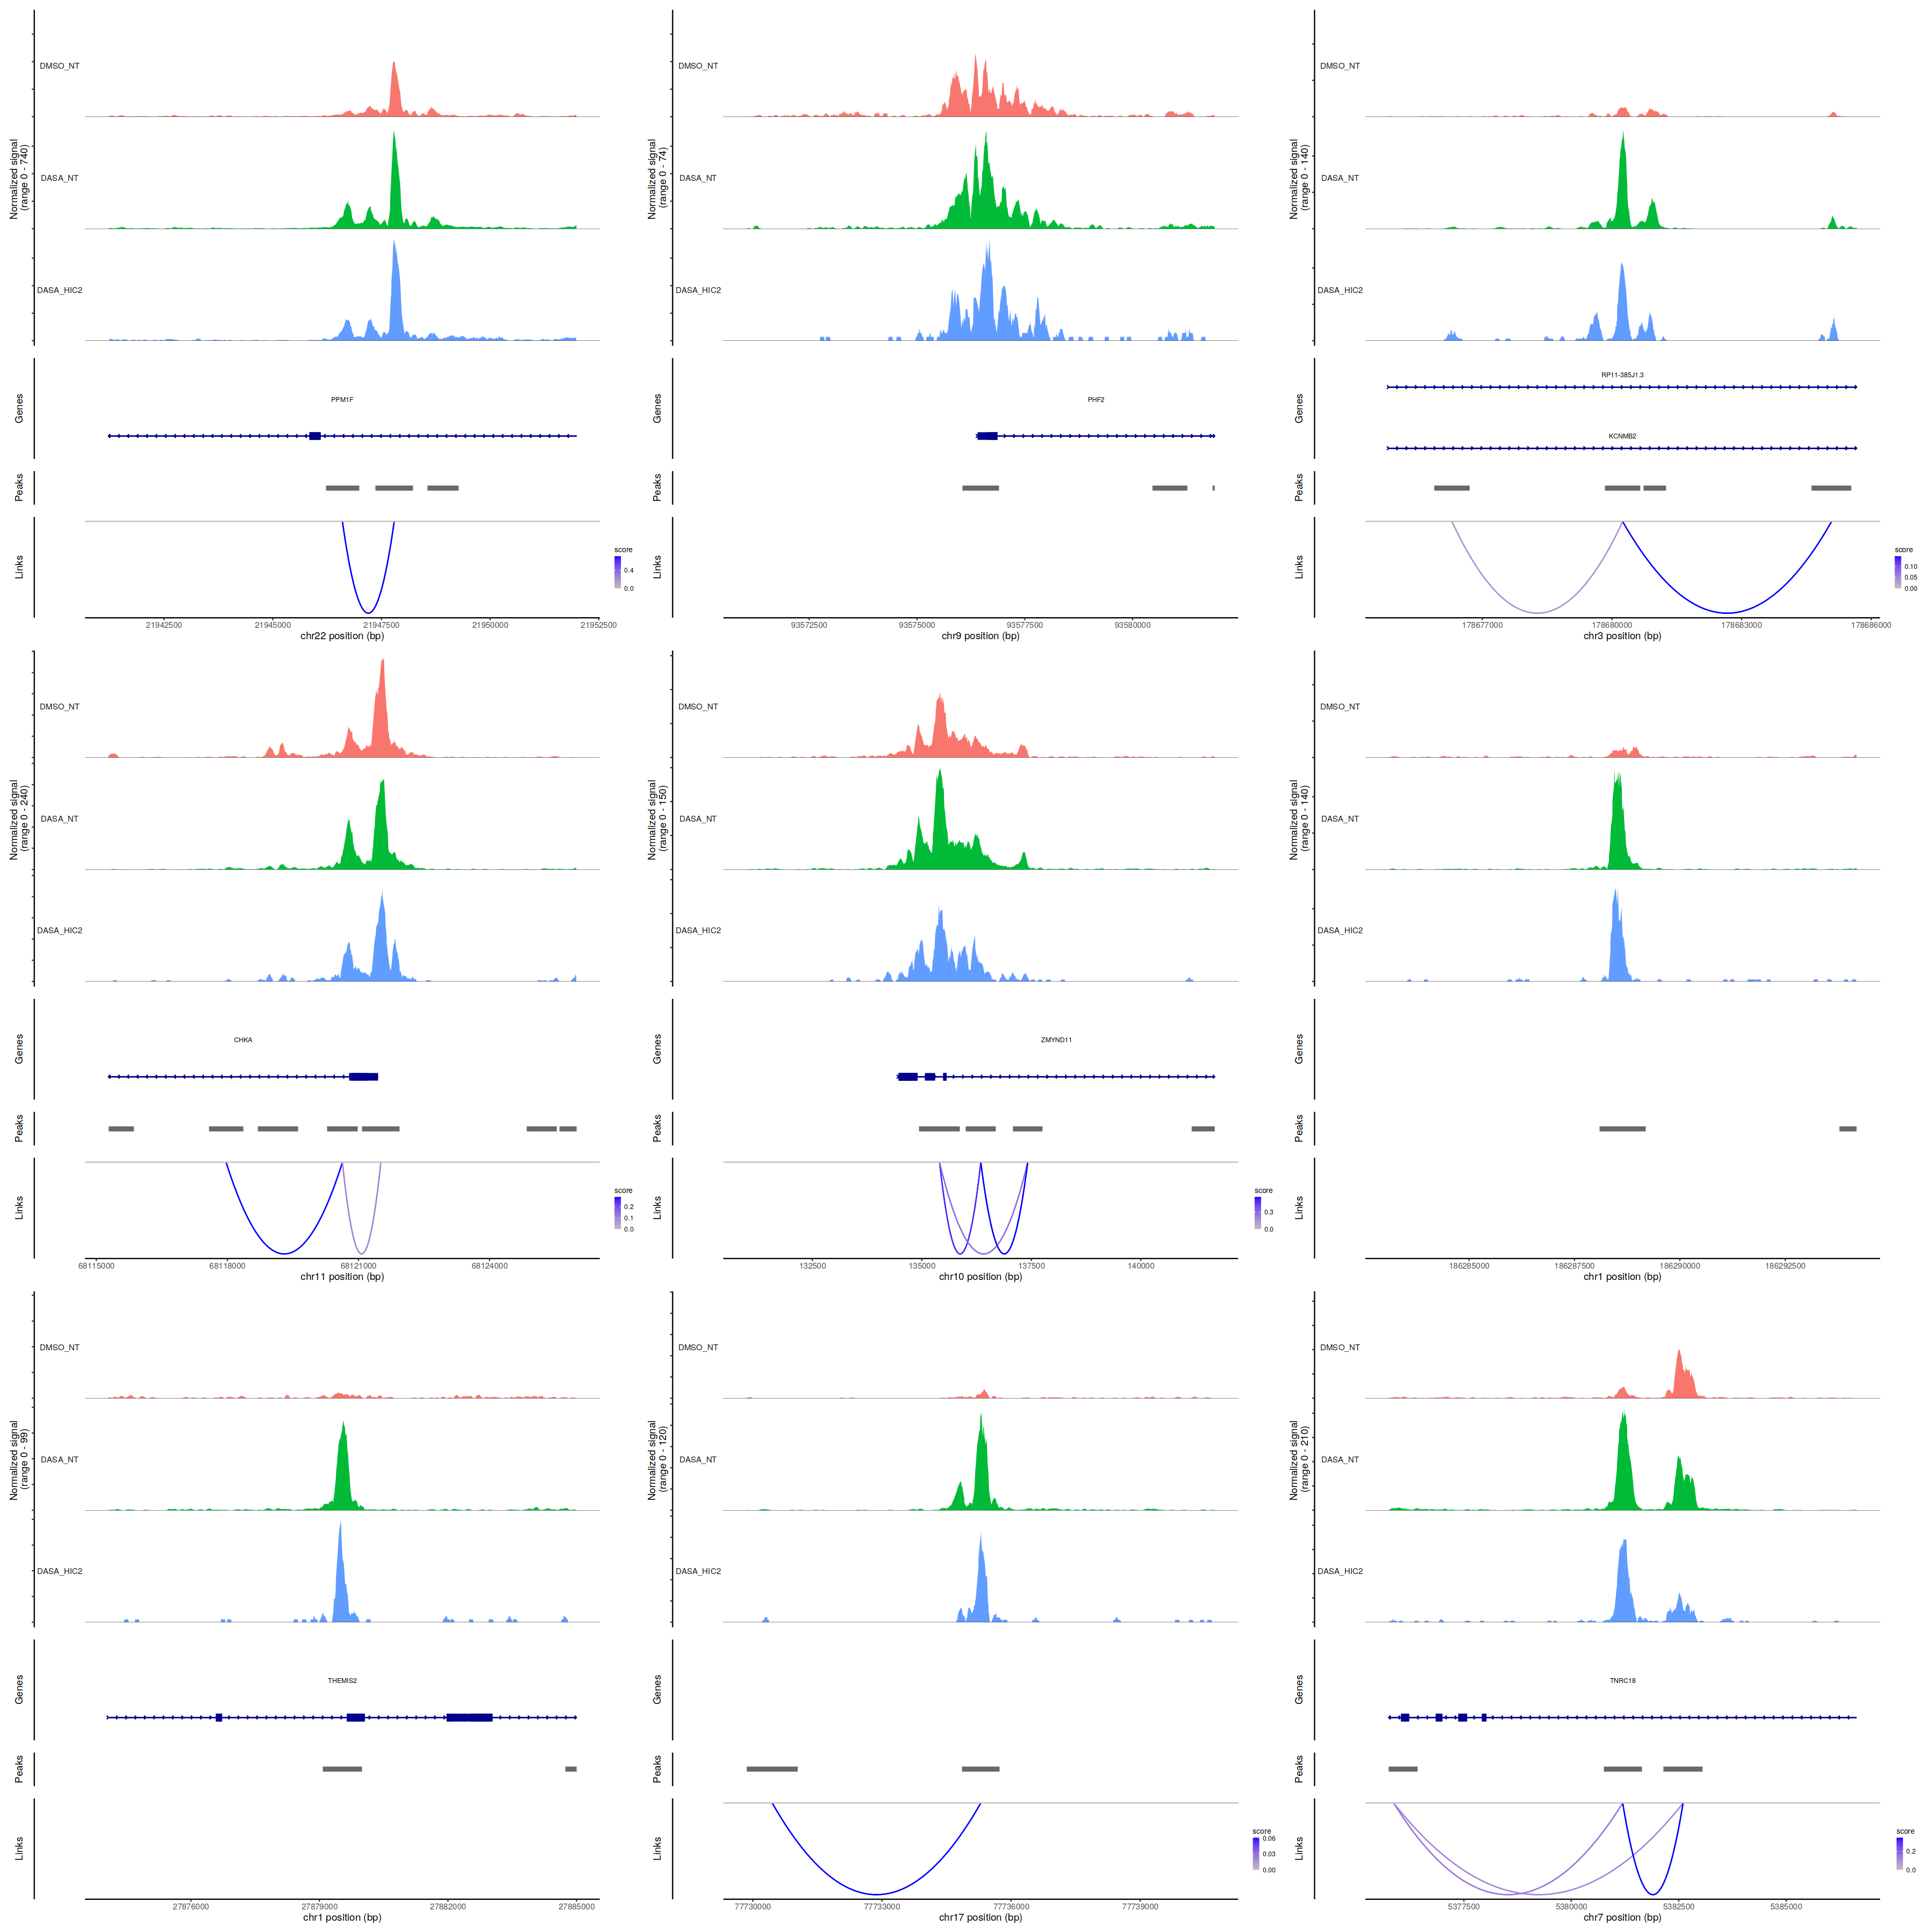

In [26]:
options(repr.plot.width = 30, repr.plot.height = 30)
CoveragePlot(sub_sobj, 
    region = sapply(down_up_down_genes$X[1:9], adjust_positions),
    expression.assay = "SCT") # TCF4

Warning message:
"Removed 37 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


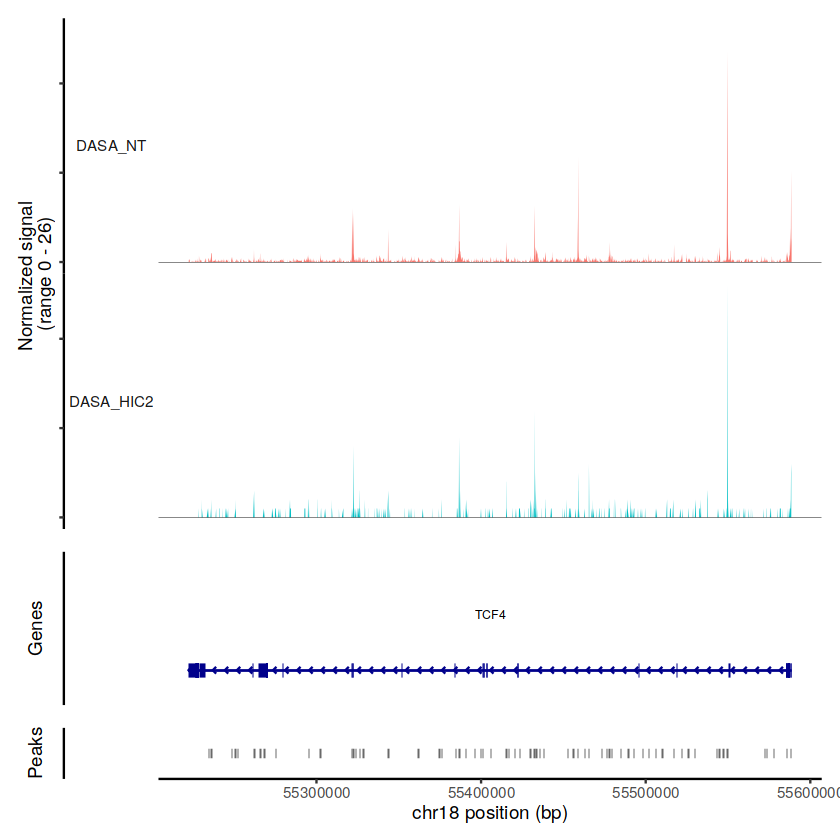

In [11]:
CoveragePlot(dasa_hic2_nt_sobj, 
    region = "chr18-55222334-55588629") # TCF4

# Generate ccans

In [16]:
# only way I could get this to run is to hard set coaccess_cutoff_override
# default is it tries to calc one on it's own (coaccess_cutoff_override = NULL)
ccans <- generate_ccans(conns, coaccess_cutoff_override = 0.1)
hic2_ccans <- generate_ccans(dasahic2_conns, coaccess_cutoff_override = 0.1) 

[1] "Coaccessibility cutoff used: 0.1"
[1] "Coaccessibility cutoff used: 0.1"


# Generate Cicero gene activity scores
monocle3 is prob broken and needs to be reinstalled on micromamba env r42 since input_cds can't be loaded or created and below can't be ran. Could not reinstall and just transfer cicero_gene_activities obj from lgr2.

In [23]:
# #### Add a column for the fData table indicating the gene if a peak is a promoter ####
# # Create a gene annotation set that only marks the transcription start sites of 
# # the genes. We use this as a proxy for promoters.
# # To do this we need the first exon of each transcript
# pos <- subset(gene_anno, strand == "+")
# pos <- pos[order(pos$start),] 
# pos <- pos[!duplicated(pos$transcript),] # remove all but the first exons per transcript
# pos$end <- pos$start + 1 # make a 1 base pair marker of the TSS

# neg <- subset(gene_anno, strand == "-")
# neg <- neg[order(neg$start, decreasing = TRUE),] 
# neg <- neg[!duplicated(neg$transcript),] # remove all but the first exons per transcript
# neg$start <- neg$end - 1

# gene_annotation_sub <- rbind(pos, neg)

# # Make a subset of the TSS annotation columns containing just the coordinates 
# # and the gene name
# gene_annotation_sub <- gene_annotation_sub[,c(1:3, 8)]

# # Rename the gene symbol column to "gene"
# names(gene_annotation_sub)[4] <- "gene"

# input_cds <- annotate_cds_by_site(input_cds, gene_annotation_sub)

# head(fData(input_cds))

# #### Generate gene activity scores ####
# # generate unnormalized gene activity matrix
# unnorm_ga <- build_gene_activity_matrix(input_cds, hic2_conns)

# # remove any rows/columns with all zeroes
# unnorm_ga <- unnorm_ga[!Matrix::rowSums(unnorm_ga) == 0, !Matrix::colSums(unnorm_ga) == 0]

# # make a list of num_genes_expressed
# num_genes <- pData(input_cds)$num_genes_expressed
# names(num_genes) <- row.names(pData(input_cds))

# # normalize
# cicero_gene_activities <- normalize_gene_activities(unnorm_ga, num_genes)

# head(cicero_gene_activities)

# # Filter out rows without values
# filtered_cicero_gene_activities <- cicero_gene_activities[rowSums(cicero_gene_activities) > 2, ]

# length(rownames(filtered_cicero_gene_activities))

In [14]:
# link to seurat obj
DefaultAssay(sobj) <- "ATAC"
links <- ConnectionsToLinks(conns = dasahic2_conns, ccans = hic2_ccans)
Links(sobj) <- links

In [15]:
# subset the seurat obj again since we added links to the sobj
sub_sobj <- subset(sobj, subset = treatment_and_guidecapture == "DASA_HIC2" | treatment_and_guidecapture == "DASA_NT")

In [16]:
DefaultAssay(sub_sobj) <- "ATAC"
Idents(sub_sobj) <- sub_sobj$treatment_and_guidecapture
Links(sub_sobj) <- links

Warning message:
"Removed 102 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


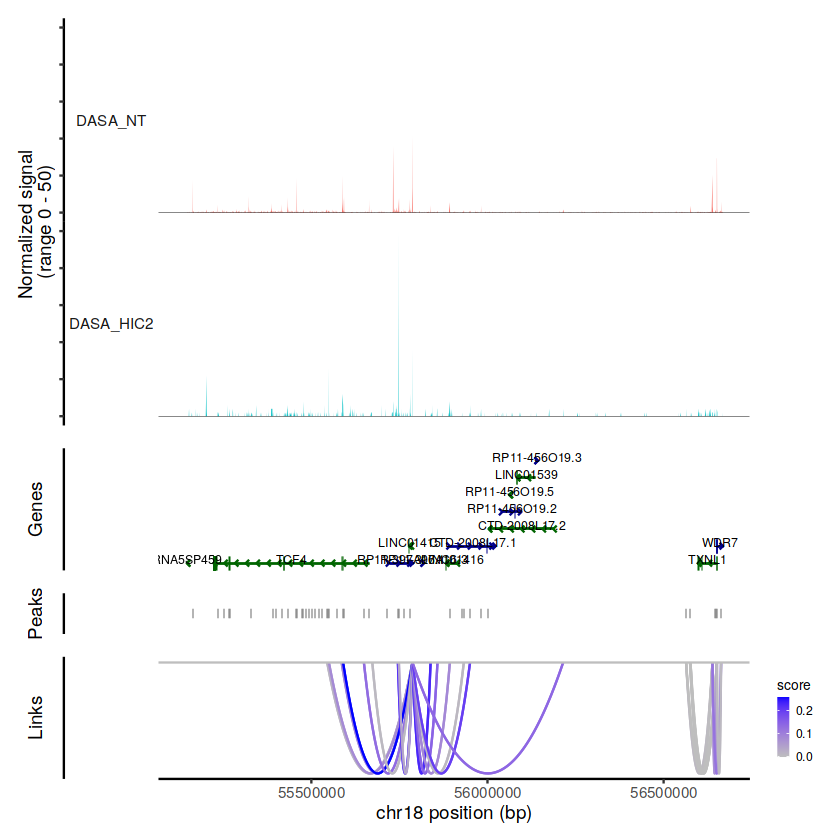

In [57]:
CoveragePlot(sub_sobj, 
    region = "chr18-55142334-56668629",
    expression.assay = "RNA") # TCF4

In [48]:
55222334-80000

[1] 55142334

In [49]:
55588629+80000

[1] 55668629